# EDA of Heart Failure Data

Joel, Yaniv, Jeff<br>
Merck Challenge - Project 2<br>
Rutgers MSDS<br>
2/4/21<br>

Items to Check for EDA:  
1. Data loading and checking  
2a. Numerical summaries  
2b. Graphical summaries  
3. Extract important variable(s) and analyze them  
3a. Check for outliers and missing data  
(Note: Did not include a on outliers (yet), as should determine the threshold of removing outliers first. I would suggest checking the jackknife residuals (refer to HW #6 from reg & TS))(EDIT: might be different for GLMs...)  
3b. Develop and test simple models  
3c. Test model assumptions

Q: How much EDA should we do? (e.g. doing summaries of a few vs all variables, using some vs all of Yaniv's EDA code, etc.)

In [1]:
### Preliminaries
import pandas as pd # essential for data analysis
import numpy as np # gives tools for working with arrays
import matplotlib.pyplot as plt # useful for plots in general
import seaborn as sns # needed for histograms
import pylab as pyl #for generating plots: show()
import statsmodels.api as sm  #to use the Logit()


In [2]:
# Loading and Checking Data
!pwd
data = pd.read_csv("/Users/yanivbronshtein/Downloads/heart_failure_clinical_records_dataset.csv")  # type and enter pwd and see if dataset is in same directory
data.head()

/Users/yanivbronshtein/Coding/Rutgers/MerckChallengeIMLRepo


age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
data.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [4]:
data.shape # 299 rows, 13 cols

(299, 13)

In [5]:
data.std()

age                            11.894809
anaemia                         0.496107
creatinine_phosphokinase      970.287881
diabetes                        0.494067
ejection_fraction              11.834841
high_blood_pressure             0.478136
platelets                   97804.236869
serum_creatinine                1.034510
serum_sodium                    4.412477
sex                             0.478136
smoking                         0.467670
time                           77.614208
DEATH_EVENT                     0.467670
dtype: float64

In [6]:
data.info() # info about each variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
age                         299 non-null float64
anaemia                     299 non-null int64
creatinine_phosphokinase    299 non-null int64
diabetes                    299 non-null int64
ejection_fraction           299 non-null int64
high_blood_pressure         299 non-null int64
platelets                   299 non-null float64
serum_creatinine            299 non-null float64
serum_sodium                299 non-null int64
sex                         299 non-null int64
smoking                     299 non-null int64
time                        299 non-null int64
DEATH_EVENT                 299 non-null int64
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.isnull().any() # check if any missing data
# Q: Which variable(s) is dtype referring to?

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
DEATH_EVENT                 False
dtype: bool

In [8]:
## Correlation matrix
data.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

In [9]:
var = 'DEATH_EVENT' # defining and checking descriptive stats of variable of interest
series = data[var]

In [10]:
print("Mean: {}".format(series.mean()))
print("Stdev: {}".format(series.std()))
print("Min: {}".format(series.min()))
print("Max: {}".format(series.max()))
print("Median: {}".format(series.median()))
print("Mode: {}".format(series.mode()))
print("Skew: {}".format(series.skew()))
print("Kurtosis: {}".format(series.kurtosis()))

Mean: 0.3210702341137124
Stdev: 0.4676704280567721
Min: 0
Max: 1
Median: 0.0
Mode: 0    0
dtype: int64
Skew: 0.7703488154389491
Kurtosis: -1.4160799150023284


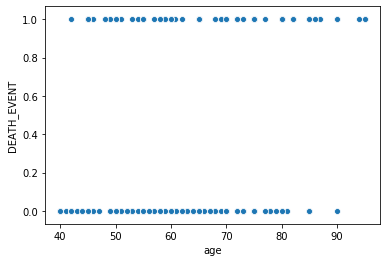

In [11]:
### Graphical Summaries
## Scatterplots
sns.scatterplot(x = "age", y = "DEATH_EVENT", data = data)

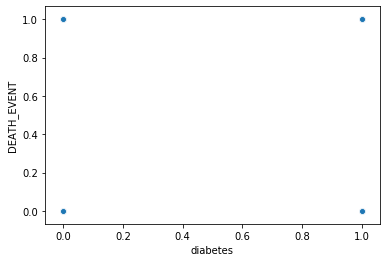

In [12]:
sns.scatterplot(x = "diabetes", y = "DEATH_EVENT", data = data)

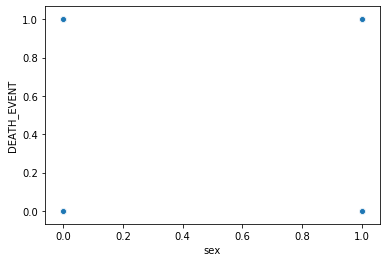

In [13]:
sns.scatterplot(x = "sex", y = "DEATH_EVENT", data = data)

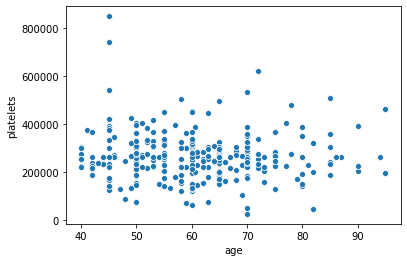

In [14]:
sns.scatterplot(x = "age", y = "platelets", data = data) # used for testing continous DV

In [15]:
#sns.pairplot(data = data)
# Q: How to zoom in on particular plots?

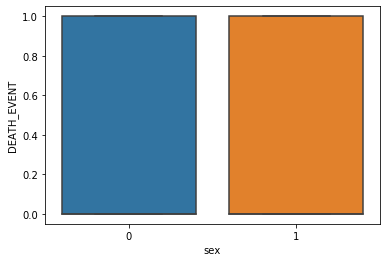

In [16]:
## Boxplots
sns.boxplot(x='sex', y='DEATH_EVENT', data= data)

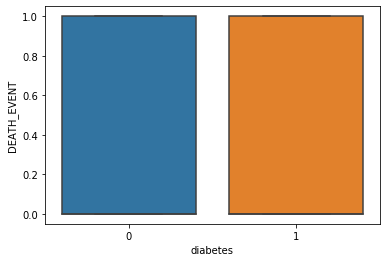

In [17]:
sns.boxplot(x='diabetes', y='DEATH_EVENT', data= data)

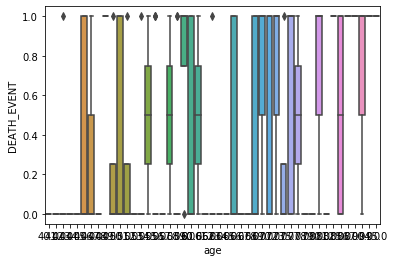

In [18]:
sns.boxplot(x='age', y='DEATH_EVENT', data= data)

In [19]:
# Get variable names

def getvar(x):
    for i in x:
        print(i)

In [20]:
getvar(data)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
DEATH_EVENT


40.0
95.0


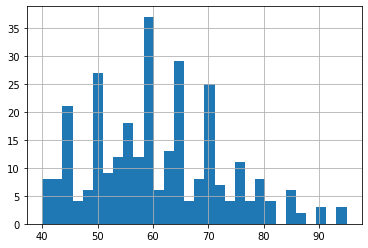

In [21]:
## Histograms
# Note: See cell 22 in Yaniv's EDA notebook

print(min(data['age']))
print(max(data['age'])) # used to check if increasing or decreasing bins is needed
data['age'].hist(bins=30)

0
1


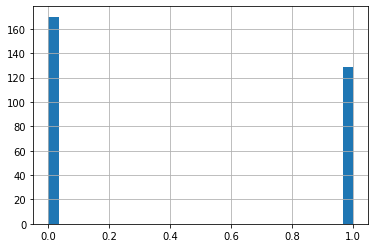

In [22]:
print(min(data['anaemia']))
print(max(data['anaemia'])) # used to check if increasing or decreasing bins is needed
data['anaemia'].hist(bins=30)

23
7861


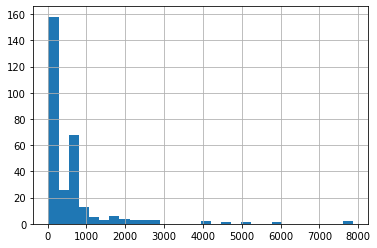

In [23]:
print(min(data['creatinine_phosphokinase']))
print(max(data['creatinine_phosphokinase'])) # used to check if increasing or decreasing bins is needed
data['creatinine_phosphokinase'].hist(bins=30)

0
1


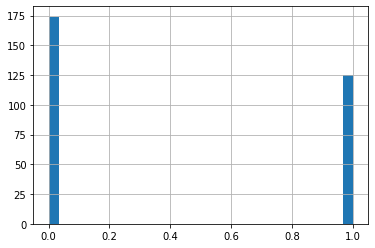

In [24]:
print(min(data['diabetes']))
print(max(data['diabetes'])) # used to check if increasing or decreasing bins is needed
data['diabetes'].hist(bins=30)

14
80


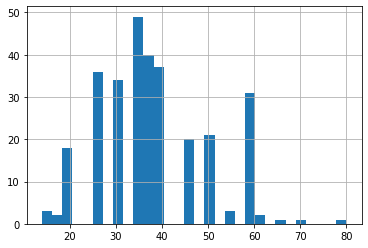

In [25]:
print(min(data['ejection_fraction']))
print(max(data['ejection_fraction'])) # used to check if increasing or decreasing bins is needed
data['ejection_fraction'].hist(bins=30)

0
1


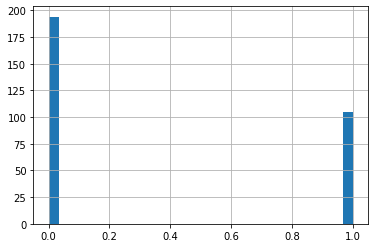

In [26]:
print(min(data['high_blood_pressure']))
print(max(data['high_blood_pressure'])) # used to check if increasing or decreasing bins is needed
data['high_blood_pressure'].hist(bins=30)

25100.0
850000.0


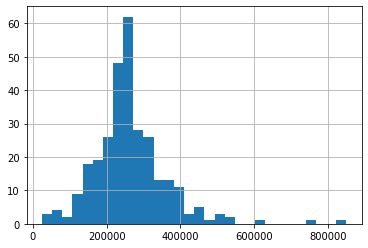

In [27]:
print(min(data['platelets']))
print(max(data['platelets'])) # used to check if increasing or decreasing bins is needed
data['platelets'].hist(bins=30)

0.5
9.4


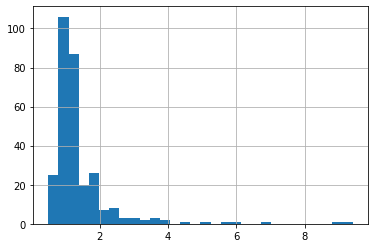

In [28]:
print(min(data['serum_creatinine']))
print(max(data['serum_creatinine'])) # used to check if increasing or decreasing bins is needed
data['serum_creatinine'].hist(bins=30)

113
148


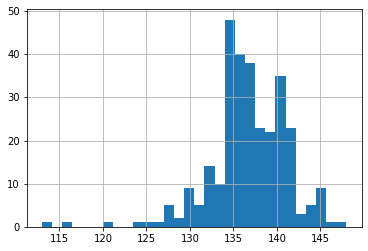

In [29]:
print(min(data['serum_sodium']))
print(max(data['serum_sodium'])) # used to check if increasing or decreasing bins is needed
data['serum_sodium'].hist(bins=30)

0
1


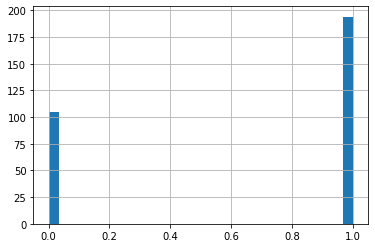

In [30]:
print(min(data['sex']))
print(max(data['sex'])) # used to check if increasing or decreasing bins is needed
data['sex'].hist(bins=30)

0
1


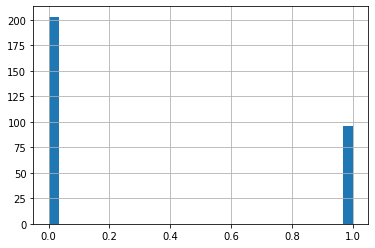

In [31]:
print(min(data['smoking']))
print(max(data['smoking'])) # used to check if increasing or decreasing bins is needed
data['smoking'].hist(bins=30)

4
285


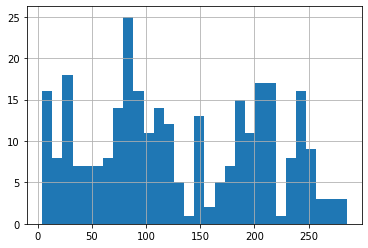

In [32]:
print(min(data['time']))
print(max(data['time'])) # used to check if increasing or decreasing bins is needed
data['time'].hist(bins=30)

0
1


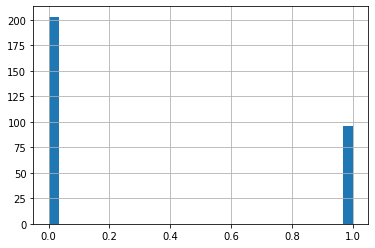

In [33]:
print(min(data['DEATH_EVENT']))
print(max(data['DEATH_EVENT'])) # used to check if increasing or decreasing bins is needed
data['DEATH_EVENT'].hist(bins=30)

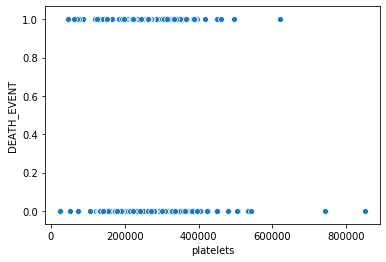

In [34]:
## Outliers
# Note: Can do it qualitatively or quantitatively... will be doing the former here. However, we can take the latter
# approach if we so desired: https://medium.com/datadriveninvestor/finding-outliers-in-dataset-using-python-efc3fce6ce32
# Q: Should use Judgement vs. IQR/Z-scores?

# Ex # 1: platelets variable
# Before
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

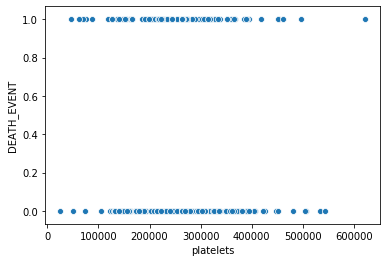

In [35]:
# After
# See cell 32 in Yaniv's EDA notebook

data = data[data['platelets'] <= 650000]
sns.scatterplot(x='platelets', y = 'DEATH_EVENT', data=data)

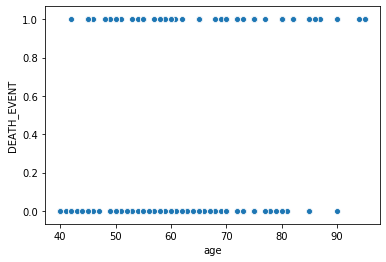

In [36]:
# Ex #2: age variable
# Note: don't think we should exclude age, as study wanted to focus on all age groups, but just to see

# Before
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

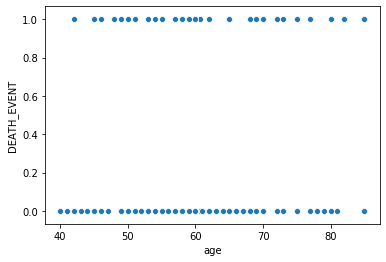

In [37]:
# After

data = data[data['age'] <= 85]
sns.scatterplot(x='age', y = 'DEATH_EVENT', data=data)

# Q: Which variables to ultimately include in predictive models? Important to know since they may need to be adjusted for outliers

# Random Forest Classifier

**Step 1: Import libraries**

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

**Step 2: Create the set`X` for the feature set and `Y` for the treatment variable from the dataframe** 

In [51]:
X = data.drop(['time','DEATH_EVENT'], axis=1)

In [52]:
X.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  int  
0        0    1  
1        0    1  
2        1    1  
3        0    1  
4        0    1

In [53]:
Y = data['DEATH_EVENT']

In [54]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [55]:
import collections
from sklearn import metrics

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
random_forest_preds = random_forest.predict(X_test)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,Y_test))
print(confusion_matrix(Y_test, random_forest_preds))


The accuracy of the Random Forests model is :	 0.7758620689655172
[[37  4]
 [ 9  8]]


In [57]:
### importing LIME modules

import lime
import lime.lime_tabular

**Create a function to display the patients that the model failed to classify correctly**

In [58]:
def display_anomalies(model_preds):
    index_list = []
    for row_index, (input, prediction, label) in enumerate(zip (X_test, model_preds, Y_test)):
      if prediction != label:
        print('Row', row_index, 'has been classified as ', prediction, 'and should be ', label)
        index_list.append(row_index)
    
    print("************************************************************************************")

    for index in index_list:
        print(X_test.iloc[index,:])
        print("************************************************************************************")



In [59]:
display_anomalies(random_forest_preds)

Row 2 has been classified as  1 and should be  0
Row 7 has been classified as  0 and should be  1
Row 10 has been classified as  0 and should be  1
************************************************************************************
age                             60.0
anaemia                          1.0
creatinine_phosphokinase       231.0
diabetes                         1.0
ejection_fraction               25.0
high_blood_pressure              0.0
platelets                   194000.0
serum_creatinine                 1.7
serum_sodium                   140.0
sex                              1.0
smoking                          0.0
int                              1.0
Name: 155, dtype: float64
************************************************************************************
age                             50.0
anaemia                          1.0
creatinine_phosphokinase       168.0
diabetes                         0.0
ejection_fraction               38.0
high_blood_pressure        

In [60]:
# predicting x based on RFs (explained using lime)

predict_fn_rf = lambda x: random_forest.predict_proba(x).astype(float)
X = X_train.values
explainer = lime.lime_tabular.LimeTabularExplainer(X,feature_names = X_train.columns,class_names=['Died','Survived'],kernel_width=5)

In [61]:
### Interpret LIME results (note: refer to data description for variable names and info)
# Ex 1:

print(X_test.loc[[38]],"death event is: ",Y_test.loc[[38]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[38]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)

## Frop top to bottom (right side of middle plot):
## We can see that the follow-up period (days), level of serum creatinine in the blood (mg/dL), 
## percentage of blood leaving the heart at each contraction (percentage), and level of the CPK enzyme in the blood (mcg/L)
## had the most positive influence on the patient's survivability. Considering these features and all others,
## the patient had an 75% chance of surviving.

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
38  60.0        0                      2656         1                 30   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
38                    0   305000.0               2.3           137    1   

    smoking  int  
38        0    1   death event is:  38    0
Name: DEATH_EVENT, dtype: int64

number of predictors are:  12


In [62]:
df_a = pd.DataFrame(Y_test)
df_b = pd.DataFrame(random_forest_preds)
comparison = pd.DataFrame({"Y_test":Y_test, "random_forest_preds": random_forest_preds})
comparison

Y_test  random_forest_preds
97        0                    0
213       1                    1
155       0                    1
152       0                    0
261       0                    0
273       0                    0
87        0                    0
13        1                    0
249       0                    0
4         1                    1
53        1                    0
241       0                    0
184       1                    1
46        1                    0
96        0                    0
185       1                    0
17        1                    0
271       0                    0
151       0                    0
174       0                    0
264       0                    0
14        0                    0
220       1                    1
175       0                    0
183       1                    1
91        0                    0
143       0                    0
141       0                    0
44        1                    0
18        1                    1
288       0                    0
201       0                    0
37        1                    0
166       0                    0
75        1                    0
161       0                    0
131       0                    1
234       0                    0
194       1                    1
207       0                    0
206       0                    0
225       0                    0
224       0                    1
125       0                    0
188       0                    0
169       0                    0
84        1                    0
272       0                    0
76        0                    0
71        0                    0
173       0                    0
10        1                    1
38        0                    1
191       0                    0
162       0                    0
233       0                    0
180       0                    0
104       0                    0

In [63]:
# Ex 2:

print(X_test.loc[[37]],"death event is: ",Y_test.loc[[37]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[37]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)

## Frop top to bottom (right side of middle plot):
## We can see that the follow-up period (days) and the patient's age had the most positive influence 
## on the patient's survivability. Considering these features and all others, the patient had an 82% chance of surviving.

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
37  82.0        1                       855         1                 50   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
37                    1   321000.0               1.0           145    0   

    smoking  int  
37        0    1   death event is:  37    1
Name: DEATH_EVENT, dtype: int64

number of predictors are:  12


In [64]:
# Ex 3:

print(X_test.loc[[213]],"death event is: ",Y_test.loc[[213]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[213]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)

## Frop top to bottom (right side of middle plot):
## We can see that the follow-up period (days), level of serum creatinine in the blood (mg/dL), 
## percentage of blood leaving the heart at each contraction (percentage), and level of serum sodium in the blood (mEq/L)
## had the most positive influence on the patient's survivability.Considering these features and all others,
## the patient had an 96% chance of surviving.

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
213  48.0        1                       131         1                 30   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
213                    1   244000.0               1.6           130    0   

     smoking  int  
213        0    1   death event is:  213    1
Name: DEATH_EVENT, dtype: int64

number of predictors are:  12


In [65]:
# Ex 4:

print(X_test.loc[[53]],"death event is: ",Y_test.loc[[53]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[53]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)

## Frop top to bottom (right side of middle plot):
## We can see that the follow-up period (days), percentage of blood leaving the heart at each contraction (percentage),
## and the patient's age had the most negative influence on the patient survivability. Considering these features and all others,
## the patient had an 82% chance of dying.

     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
53  70.0        1                        69         1                 50   

    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
53                    1   351000.0               1.0           134    0   

    smoking  int  
53        0    1   death event is:  53    1
Name: DEATH_EVENT, dtype: int64

number of predictors are:  12


Takeaway:

Based on some of the results above, it would seem that time is the most influential feature on the patient's survivability. This is expected, since, as patients age, they are more likely to experience heart failure, regardless of their gender. Whether they survive such a medical outbreak depends on their physiological makeup - particularly, certain chemical content in their blood, however.

(Note: Would like to interpret more observations, but the code below doesn't work for certain values for some reason... tried 115, 44, 79, etc.)

In [66]:
 #Actually survived but model said they died
print(X_test.loc[[155]],"death event is: ",Y_test.loc[[155]])
print("")
print("number of predictors are: ",len(X_test.columns))
choosen_instance = X_test.loc[[155]].values[0]
exp = explainer.explain_instance(choosen_instance, predict_fn_rf,num_features=12)
exp.show_in_notebook(show_all=False)

# Note: doesn't work for certain observations... how come? (code was already here)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
155  60.0        1                       231         1                 25   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
155                    0   194000.0               1.7           140    1   

     smoking  int  
155        0    1   death event is:  155    0
Name: DEATH_EVENT, dtype: int64

number of predictors are:  12


# Partial Dependence Plots (PDPs)

In [67]:
feature_names = X_test.columns.tolist()
feature_names

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'smoking',
 'int']

In [68]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots



In [69]:
def create_pdp_plot(model, feature_names, feature_name):
    # Create the data that we will plot
    pdp_goals = pdp.pdp_isolate(model=model, dataset=X_test, model_features=feature_names, feature=feature_name)

    # plot it
    pdp.pdp_plot(pdp_goals, feature_name)
    plt.show()


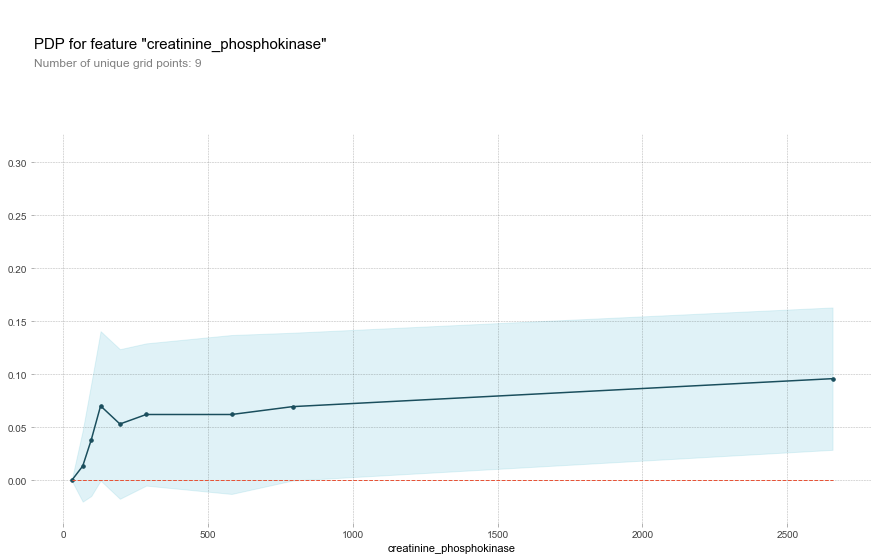

In [70]:
create_pdp_plot(random_forest, feature_names, feature_names[2])

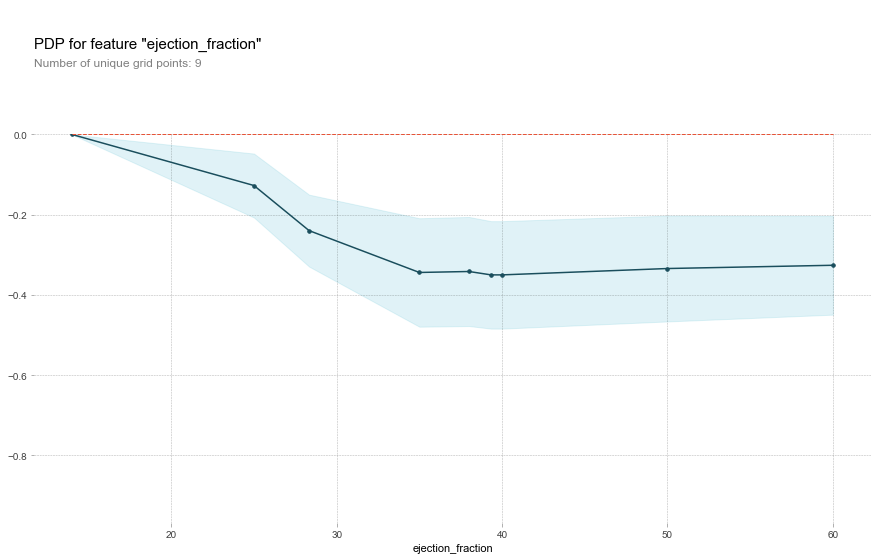

In [71]:
create_pdp_plot(random_forest, feature_names, feature_names[4])

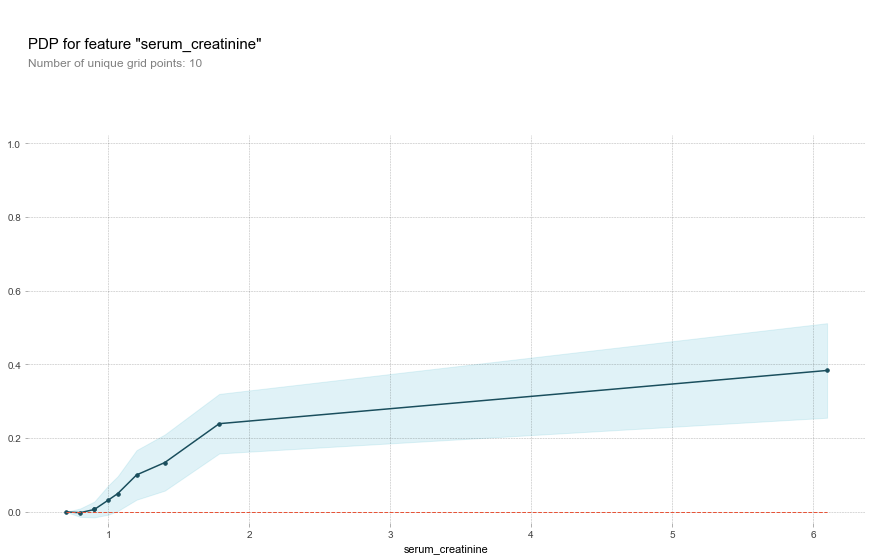

In [72]:
create_pdp_plot(random_forest, feature_names, feature_names[7])

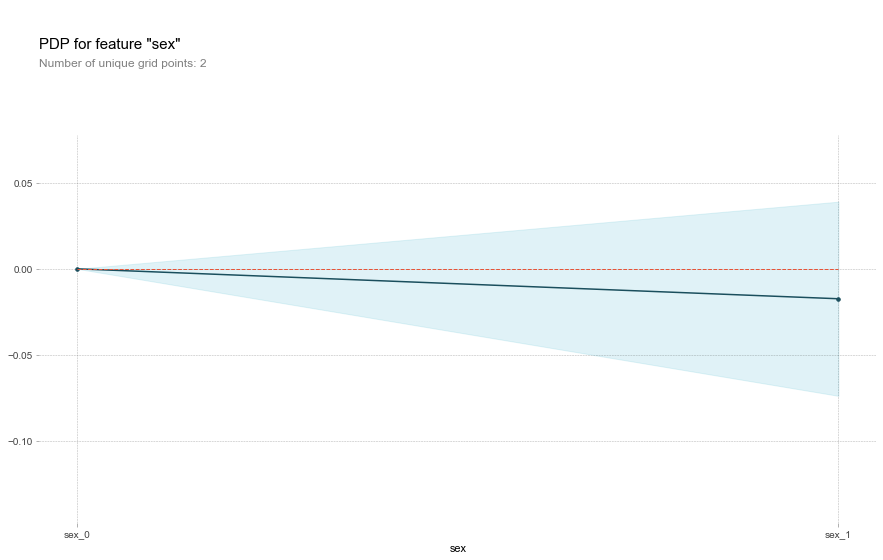

In [73]:
create_pdp_plot(random_forest, feature_names, feature_names[9])

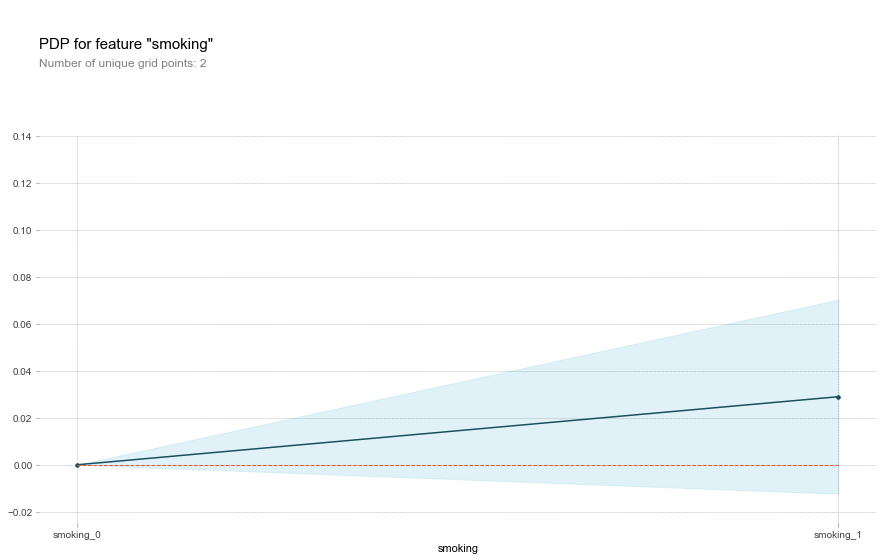

In [74]:
create_pdp_plot(random_forest, feature_names, feature_names[10])

# 2D PDP Plots

In [75]:
def create_pdp_2d(model, feature_names, indices, plot_type):
    # Similar to previous PDP plot except we use pdp_interact instead of pdp_isolate and pdp_interact_plot instead of pdp_isolate_plot
    features_to_plot = [feature_names[i] for i in indices]
    inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=feature_names, features=features_to_plot)

    pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type=plot_type)
    plt.show()


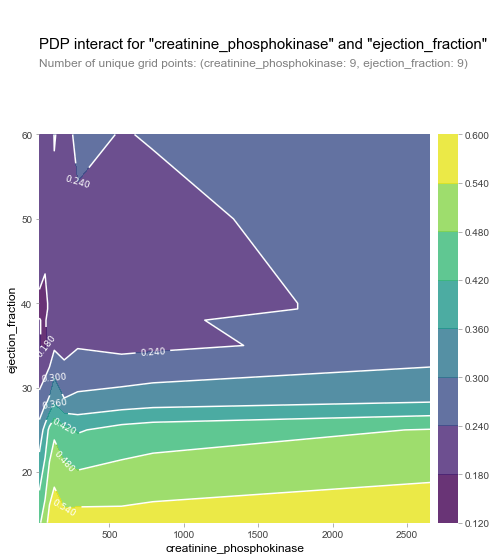

In [76]:
create_pdp_2d(random_forest, feature_names, (2,4), 'contour')

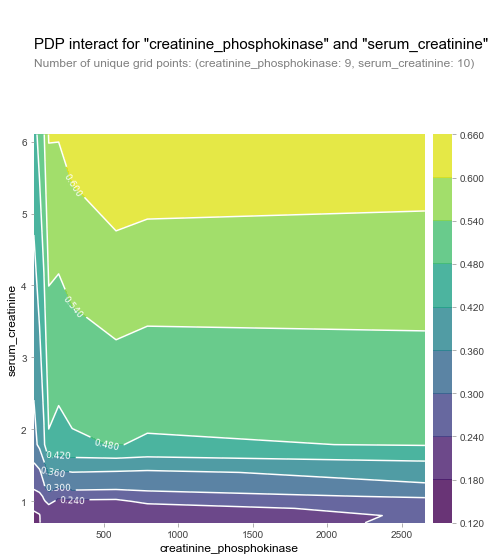

In [77]:
create_pdp_2d(random_forest, feature_names, (2,7), 'contour')

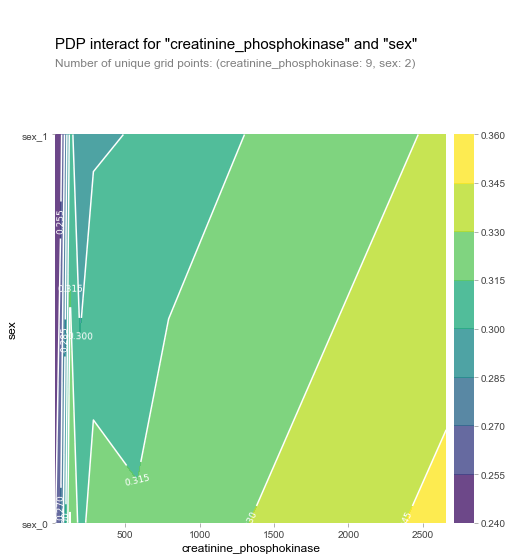

In [78]:
create_pdp_2d(random_forest, feature_names, (2,9), 'contour')

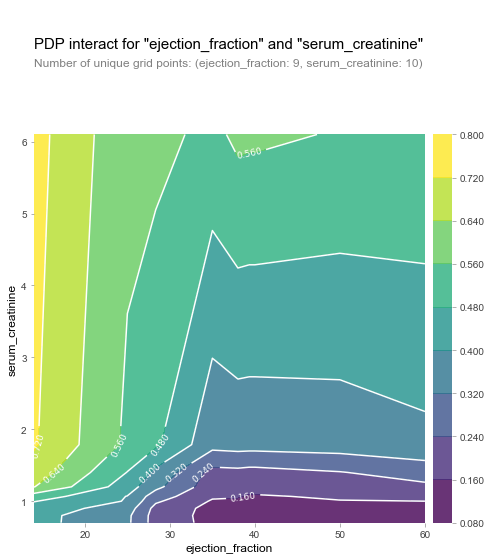

In [79]:
create_pdp_2d(random_forest, feature_names, (4,7), 'contour')

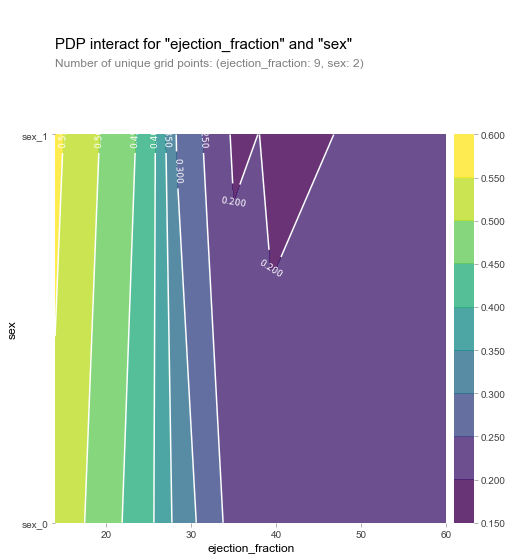

In [80]:
create_pdp_2d(random_forest, feature_names, (4,9), 'contour')

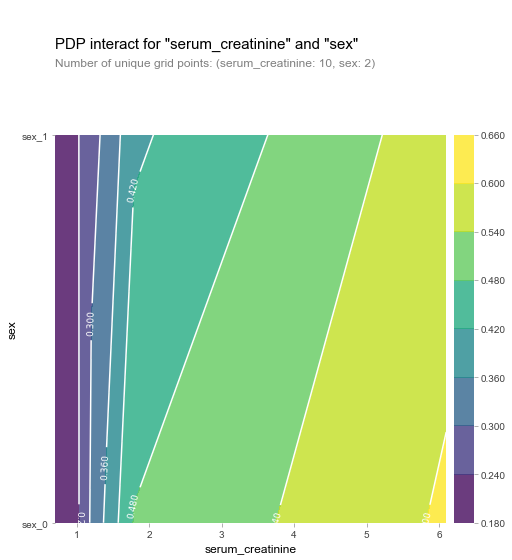

In [81]:
create_pdp_2d(random_forest, feature_names, (7,9), 'contour')

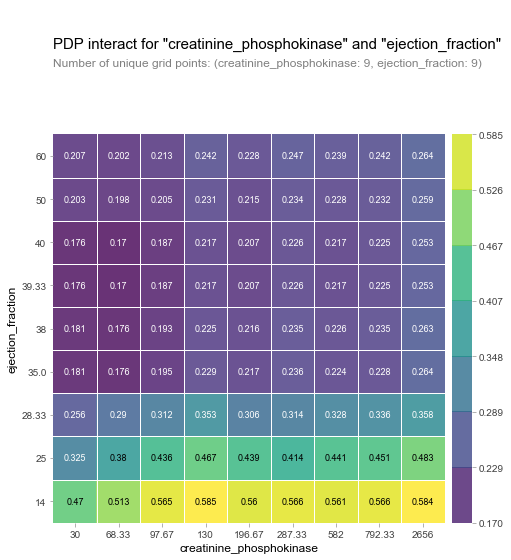

In [82]:
create_pdp_2d(random_forest, feature_names, (2,4), 'grid')

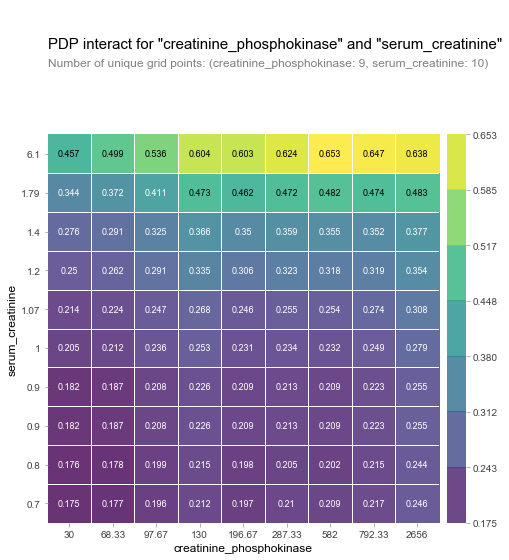

In [83]:
create_pdp_2d(random_forest, feature_names, (2,7), 'grid')

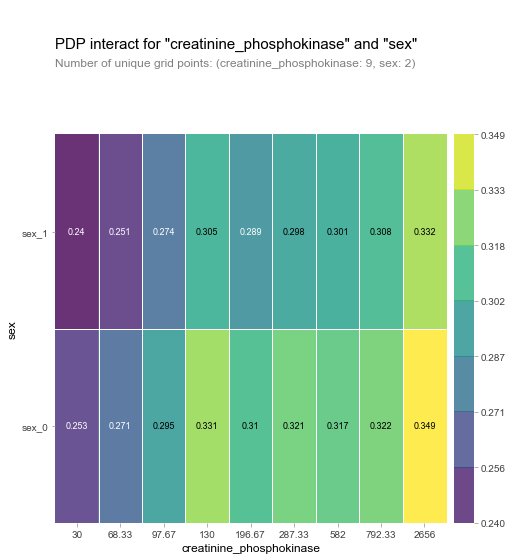

In [84]:
create_pdp_2d(random_forest, feature_names, (2,9), 'grid')

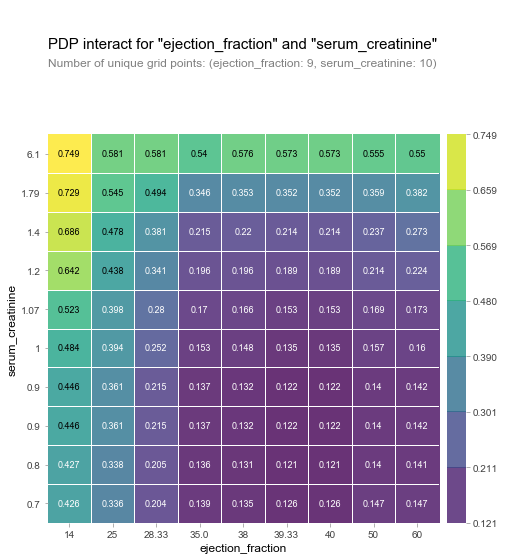

In [85]:
create_pdp_2d(random_forest, feature_names, (4,7), 'grid')

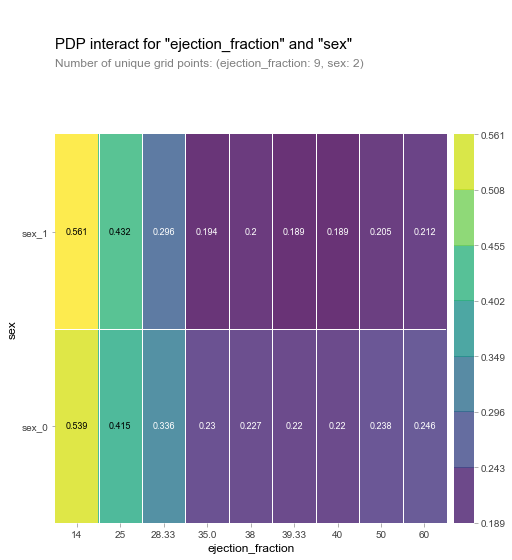

In [86]:
create_pdp_2d(random_forest, feature_names, (4,9), 'grid')

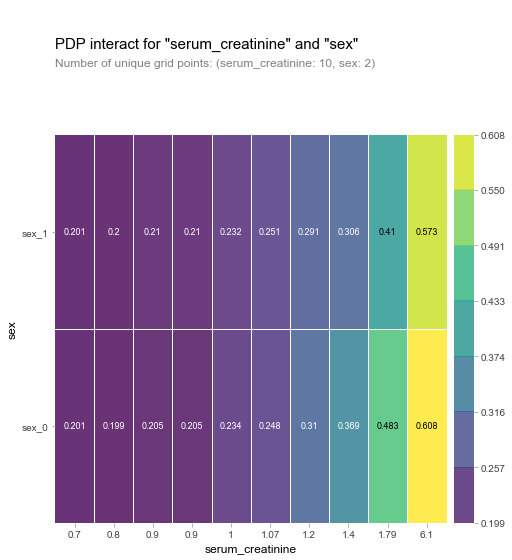

In [87]:
create_pdp_2d(random_forest, feature_names, (7,9), 'grid')

# Shapley Values

In [89]:
# !pip install shap

In [90]:
import shap

In [105]:
shap_explainer = shap.Explainer(random_forest)
shap_values = shap_explainer(X_test)

# visualize the first prediction's explanation
# shap.plots.waterfall(shap_values[0])

In [106]:
shap.plots.bar(shap_values)

TypeError: flip() missing 1 required positional argument: 'axis'

In [107]:
shap.plots.waterfall(shap_values[0])

Exception: waterfall_plot requires a scalar base_values of the model output as the first parameter, but you have passed an array as the first parameter! Try shap.waterfall_plot(explainer.base_values[0], values[0], X[0]) or for multi-output models try shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0]).

# Permutation Feature Importance

In [126]:
from sklearn.inspection import permutation_importance

In [127]:
def show_perm_importance(model, X, Y):
    r = permutation_importance(model, X, Y, n_repeats=30, random_state=101)
    importance = r.importances_mean
    for i, v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i, v))

**Importance using random_forest which was done using train-test-split with with X and Y being from the testing**

In [128]:
show_perm_importance(model=random_forest, X=X_test, Y=Y_test)

IndexError: list index out of range

**Importance using random_forest which was done using train-test-split with with X and Y being from the training**